### Reciprocal sums of prime powers

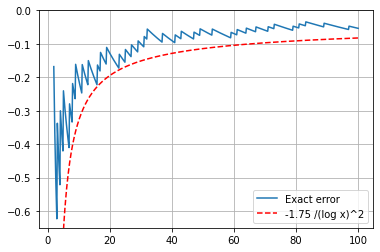

In [9]:
#Comparison of the lower bound of Proposition 3.2.2 with the exact error
from ipywidgets import *
import numpy as np 
import matplotlib.pyplot as plt

def Error1(x):
    return N(sum([1./k for k in [1..x] if is_prime_power(k)]))-log(log(x*1.))-1.034653882

def Error2(x):
    return -N(1.75/(log(x))^2)

x=np.linspace(2,100,num=600)
y1=[]
y2=[]
for l in x:
    z1=Error1(l)
    y1.append(z1)
    z2=Error2(l)
    y2.append(z2)
plt.ylim(-.65,0)   
plt.plot(x,y1,label='Exact error')
plt.plot(x,y2,'--' ,color='red',label='-1.75 /(log x)^2')
plt.grid()
plt.legend()
plt.show()

In [1]:
#We check here that the upper bound of the proposition holds.
#Below shows that \varepsilon(p^a)<0 for all prime-powers p^a between 2 and 2278383.

P=2278421
minp=2
B2=1.03454778250106                                       # the prime-power reciprocal constant 
Max=0
Min=0
SS=N(sum([1./j for j in [2..minp] if is_prime_power(j)])) # the sum of reciprocal of prime-power 
for k in [minp+1..P]:
    EE=SS-log(log(k*1.))-B2                               # this is the quantity \varepsilon(x) in (3.7)
    Max=max(EE, Max)
    if is_prime_power(k+1):
        SS=SS+1./(k+1)
        ee=SS-log(log((k+1)*1.))-B2-1./(k+1)
        Min=min(ee, Min)
    else:
        ee=SS-log(log((k+1)*1.))-B2
        Min=min(ee, Min)
print([Max, Min])

[0, -0.861182042479341]


In [2]:
#We check that \varepsilon(p^a)<10^{-4} for all prime-powers p^a between 2 and 2278383.

B2=1.03454778250106
minp=2
Sum=N(sum([1./j for j in [2..minp] if is_prime_power(j)]))
Max=0
Min=0
for k in [minp+1..2278383]:
    Eps=Sum-log(log(k*1.))-B2
    Max=max(Max,Eps) 
    Min=min(Min,Eps)
    if is_prime_power(k):
        Sum=Sum+1./k
print([Max, Min])

[0.0000843723609313951, -0.628595610117759]


In [2]:
#We check here that the lower bound of the proposition holds.
#Defining constants
B2_up=1.0346539   # B2 rounded up
B2_down=1.03465388 # B2 rounded down
X=3000000
Max=0
Min=0

# the actual sum
S=0 
for k in range(2,X+1):
    if is_prime_power(k):
        m1=S-log(log(k*1.))-B2_up+1.75/(log(k*1.))^2 # use value just before prime power k
        Min=min(m1,Min)
        S=S+1./k
        m2=S-log(log(k*1.))-B2_down                  # use value at prime power k  
        Max=max(m2,Max)
print(f"Min >= {Min} and Max  <= {Max}") # Objectives Min >=0 and Max <=0 

Min >= 0 and Max  <= 0


### A lower estimate of the integral $I$

Let $\zeta_{Q(\sqrt{-d})}(s)$ be the Dedekind zeta function of the quadratic fields $Q(\sqrt{-d})$. We define the integral $I$ as follows
$$
I = \frac{1}{2i\pi} \int_{2-i\infty}^{2+i\infty}\zeta_{-d}(s+\beta)\frac{x^s}{s(s+2)(s+3)}ds.
$$
By shifting the path integral to $\textrm{Re}(s)=-\beta$, we obtain
$$
I= \frac{L(1,\chi)\, x^{1-\beta}}{(1-\beta)(3-\beta)(4-\beta)} + J,
$$
where 
$$
J=\frac{1}{2i\pi}\int_{-\beta-i\infty}^{-\beta+i\infty}\zeta(s+\beta)L(s+\beta,\chi)\frac{x^s}{s(s+2)(s+3)}ds.
$$
It is clear that in order to estimate $I$, we need to take care of the integral $J$. This is done by means of Lemma 3.4.4. Using the assumption on the quantity $1-\beta$, we get

In [2]:
assum=N(1-6.035/sqrt(300000000))
assum2=N(1-6.035/sqrt(300000000))^2
print('beta >', assum)
print('beta^2 >', assum2)

beta > 0.999651569112544
beta^2 > 0.999303259629171


Hence, we can assume that $\beta^2>0.999$.

We recall the following bound of the integral $J$:
\begin{equation}
|J|\leq \frac{x^{-\beta}}{2\pi}\int_{-\infty}^{\infty}\frac{|\zeta(it)L(it,\chi)|}{\sqrt{(0.999+t^2)(1+t^2)(4+t^2)}}dt.
\end{equation}

Here is the place where we utilize results on $|\zeta(1+it)|$ and $|L(1+it,\chi)|$ given by Patel and Dudek respectively. To estimate $J$ as above, we write 
$$
|J|\leq \frac{x^{-\beta}}{2\pi}\sqrt{d}\left((J_1+J_3)\log d+J_3+J_4\right),
$$
so that we need to separetely evaluate the integrals $J_i$'s.

$$
J_1=\frac{1}{2\pi}\int^{-3}_{3}\frac{|t\zeta(1-it)|}{\sqrt{(0.999+t^2)(1+t^2)(4+t^2)}}dt
$$

In [13]:
#By using the rounded-down bound of \beta^2 at the third digit, we have
z=0.999

J1=N(integral(abs(x*zeta(1-I*x))/sqrt((z+x^2)*(1+x^2)*(4+x^2)), x,-3,3)/(2*pi))
J1

0.196922913137095

$$
J_2=\frac{1}{2\pi}\int^{-3}_{3}\frac{|t\zeta(1-it)|\log(e(|t|+\tfrac{14}{5}))}{\sqrt{(0.999+t^2)(1+t^2)(4+t^2)}}dt
$$

In [9]:
J2=N(integral(abs(x*zeta(1-I*x)*log(e*(abs(x)+14/5)))/sqrt((z+x^2)*(1+x^2)*(4+x^2)), x,-3,3)/(2*pi))
J2

0.452039375676943

$$
J_3=\frac{0.8}{2\pi}\int_{3}^{\infty}\frac{t\log(t)}{\sqrt{(0.999+t^2)(1+t^2)(4+t^2)}}dt
$$

In [10]:
J3=N(integral(x*log(x)/sqrt((z+x^2)*(1+x^2)*(4+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)))
J3

0.208819965381526

$$
J_4=\frac{0.8}{2\pi}\int_{3}^{\infty}\frac{t\log(t)\log\left(e(t+\tfrac{14}{5})\right)}{\sqrt{(0.999+t^2)(1+t^2)(4+t^2)}}dt
$$

In [11]:
J4=N(integral((x*log(x)*log(e*(x+14/5)))/sqrt((z+x^2)*(1+x^2)*(4+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)))
J4

0.818136240470635

In [19]:
#After rounding-up at the third digit each J_i, we have
J13=0.197+0.209
J24=0.453+0.819
print('J1+J3 is equal to', J13)
print('J2+J4 is equal to', J24)

J1+J3 is equal to 0.406000000000000
J2+J4 is equal to 1.27200000000000


In [21]:
upJ=N((J13+J24/log(300000000))/(2*pi)); upJ

0.0749884448026797

### Finding the upper bound

$\textbf{Case 1}$

In [3]:
pb=N(pi/((3-assum)*(4-assum))); pb

0.523446777485857

In [70]:
t_1=N((396*pb)/pi^2); t_1

21.0023538391792

In [71]:
t_2=N((396*0.150*6.035)/(pi^2*101)); t_2

0.359618976147739

 $\textbf{Case 2}$

In [2]:
#defining the function k_0
K0(logd,ld)=ceil(.5*(logd-log(4.))/log(ld*1.))

#defining the sigma function
def Sigma(ld):
    return N(2*sum([1./k for k in [1..ld] if is_prime_power(k)]))

#first error in Er(d,l(d))
def Err0(ld):
    return N(3.6/log(ld)^2)

In [3]:
print('Sigma=', Sigma(16),'exposigma=',N(e*Sigma(16)))

Sigma= 3.78526751026751 exposigma= 10.2894238890166


In [4]:
N(Err0(16))

0.468308020726262

In [37]:
N(1+2*log(2))+Err0(16)

2.85460238184615

In [41]:
N(11/(101*sqrt(2*pi)))

0.0434491592516412

In [42]:
def plot_case2(t):
    k=K0(t,16)
    D2=0.044*(1+k)/(1+k-3.786)*(10.29/k)^k/sqrt(k)
    return N((21.003-0.023*t)/(2.855+D2))

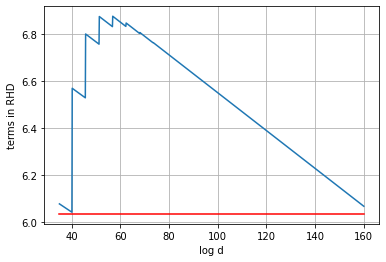

In [90]:
import numpy as np 
import matplotlib.pyplot as plt

Num=1000
x=np.linspace(35,160,num=Num)
y=[]
for t in x:
    z=plot_case2(t)
    y.append(z)
w=6.035*np.ones(Num)
plt.plot(x,y)
plt.plot(x,w,'-',color='red')
plt.ylabel('terms in RHD')
plt.xlabel('log d')
plt.grid()
plt.show()

$\textbf{Case 3}$

In [44]:
lowert=N(.25*(160-log(4.))); lowert

39.6534264097200

In [59]:
k0=N((2*lowert)/log(lowert)); k0

21.5497366147680

In [50]:
err=N(2*(1.03465+min(0.2/(log(39))^3,0.0001))); err

2.06950000000000

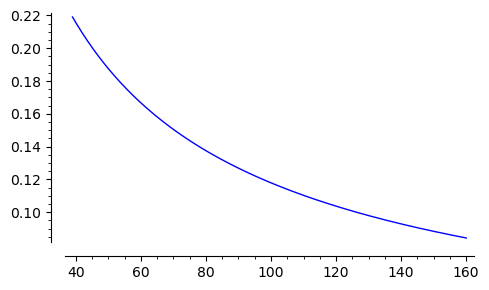

In [51]:
var('t')
plot(log(t)*(log(log(t))+1.034)/t, (t, 39, 160), figsize=[5,3])

In [54]:
upperesk0=N((e*log(lowert)*(2*log(log(lowert))+2.07))/(2*lowert)); upperesk0

0.589820364966413

In [57]:
upks=N(1/(1-(upperesk0/e))); upks

1.27711113171791

In [65]:
N((11/101)*(upks/sqrt(2*pi*ceil(k0))*upperesk0^ceil(k0)))

1.06864516444639e-7

In [67]:
denom=N(1+2*log(2)+3.6/(log(lowert))^2); denom

2.65210049703038

In [74]:
print(t_1,'and',t_2)

21.0023538391792 and 0.359618976147739


In [75]:
print(N(t_1/denom),'and',N(t_2/denom))

7.91913951326357 and 0.135597793730069


In [78]:
N(t_1/denom-((t_2/denom)*4*lowert+log(4))/lowert)

7.34178807168699

In [81]:
N((21.003/2.653)-(0.36/2.653)*((4*39.653+log(4))/39.653))

7.36917232139581